In [1]:
#import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import scipy.stats
import numpy as np
from math import sqrt
import statsmodels.formula.api as smf

D:\US\Anaconda\Anaconda\envs\urbsim\Lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
#set up the metric calculations
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [4]:
#read in the cdatasub from the first week
cdatasub = pd.read_csv("london_flows.csv")

In [5]:
cdatasub.head(10)

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.410852
1,Abbey Road,Beckton,1,599,442,8510.047006
2,Abbey Road,Blackwall,3,599,665,3775.359872
3,Abbey Road,Canary Wharf,1,599,58772,5086.404941
4,Abbey Road,Canning Town,37,599,15428,2228.874185
5,Abbey Road,Crossharbour,1,599,1208,6686.335036
6,Abbey Road,Custom House,0,599,845,3824.789936
7,Abbey Road,Cutty Sark,2,599,1748,8503.736582
8,Abbey Road,Cyprus,7,599,850,6532.037185
9,Abbey Road,Devons Road,1,599,611,3958.290432


In [6]:
#show the actual flows between boroughs
cdatasubmat = pd.pivot_table(cdatasub, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
#show the data
cdatasubmat

C:\Users\10945\AppData\Local\Temp\ipykernel_20300\2414277126.py:2: FutureWarning: The provided callable <function sum at 0x000001316862B6A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmat = pd.pivot_table(cdatasub, values ="flows", index="station_origin", columns = "station_destination",
C:\Users\10945\AppData\Local\Temp\ipykernel_20300\2414277126.py:2: FutureWarning: The provided callable <function sum at 0x000001316862B6A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmat = pd.pivot_table(cdatasub, values ="flows", index="station_origin", columns = "station_destination",
C:\Users\10945\AppData\Local\Temp\ipykernel_20300\2414277126.py:2: FutureWarning: The provided callable <function sum at 0x000001316862B6A0> i

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [7]:
#create the formula (the "-1" indicates no intercept in the regression model).
dbl_form = 'flows ~ station_destination + station_origin + distance-1'
#run a doubly constrained sim
doubSim = smf.glm(formula = dbl_form, data=cdatasub, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(doubSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    60676
Model Family:                 Poisson   Df Model:                          797
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.6545e+05
Date:                Sun, 21 Apr 2024   Deviance:                   1.5587e+06
Time:                        15:17:59   Pearson chi2:                 2.05e+06
No. Iterations:                    27   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [8]:
#get the estimates
cdatasub["doubsimfitted"] = np.round(doubSim.mu)
#here's the matrix
cdatasubmat7 = cdatasub.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatasubmat7

C:\Users\10945\AppData\Local\Temp\ipykernel_20300\1764218673.py:4: FutureWarning: The provided callable <function sum at 0x000001316862B6A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmat7 = cdatasub.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
C:\Users\10945\AppData\Local\Temp\ipykernel_20300\1764218673.py:4: FutureWarning: The provided callable <function sum at 0x000001316862B6A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmat7 = cdatasub.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
C:\Users\10945\AppData\Local\Temp\ipykernel_20300\1764218673.py:4: FutureWarning: The provided callable <function sum at 0x000001316

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,601.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1220.0
Acton Town,NaN,NaN,NaN,11.0,10.0,NaN,17.0,0.0,NaN,13.0,...,41.0,4.0,2.0,19.0,NaN,0.0,NaN,1.0,NaN,3746.0
Aldgate,NaN,NaN,2.0,NaN,32.0,NaN,NaN,0.0,NaN,23.0,...,7.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2888.0
Aldgate East,NaN,NaN,2.0,38.0,NaN,NaN,0.0,0.0,NaN,25.0,...,7.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,39.0,45.0,NaN,NaN,NaN,NaN,26.0,...,8.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,2.0,17.0,16.0,NaN,1.0,NaN,NaN,26.0,...,10.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,3097.0


In [9]:
cdatasubmat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [9]:
CalcRSqaured(cdatasub["flows"],cdatasub["doubsimfitted"])

0.47663287125851955

In [10]:
CalcRMSE(cdatasub["flows"],cdatasub["doubsimfitted"])

95.196

In [10]:
has_missing = cdatasub['distance'].isna().any()

if has_missing:
    print("distance has Na")
else:
    print("distance dosen't have Na")


distance dosen't have Na


In [11]:
if (cdatasub['distance'] == 0).any():
    print("distance has 0")
else:
    print("distance dosen't have 0")


distance has 0


In [50]:
zero_values = cdatasub[cdatasub['distance'] == 0]


print(zero_values)


          station_origin station_destination  flows  population   jobs  \
4985         Blackfriars         Blackfriars      1        6781  10849   
8847        Canary Wharf        Canary Wharf      0       14632  58772   
9444       Cannon Street       Cannon Street      0        3874   4698   
16611  Elephant & Castle   Elephant & Castle      0        9325   6427   
17552             Euston              Euston      0       17796  16800   
17807      Euston Square       Euston Square      0        4926   8093   
18940      Finsbury Park       Finsbury Park      0       24735   6769   
21752    Hackney Central     Hackney Central      0        3370   2440   
21809      Hackney Downs       Hackney Downs      1         843    835   
22242        Hammersmith         Hammersmith      0       11818  18250   
32294          Limehouse           Limehouse     38        5348   2969   
32472   Liverpool Street    Liverpool Street      0       31473  61122   
32755      London Bridge       London 

In [12]:
cdatasub.loc[cdatasub['distance'] == 0, 'distance'] = 0.00000001
cdatasub.loc[cdatasub['flows'] == 0.00000001, 'flows'] = 0

print(cdatasub)


         station_origin station_destination  flows  population   jobs  \
0            Abbey Road   Bank and Monument      0         599  78549   
1            Abbey Road             Beckton      1         599    442   
2            Abbey Road           Blackwall      3         599    665   
3            Abbey Road        Canary Wharf      1         599  58772   
4            Abbey Road        Canning Town     37         599  15428   
...                 ...                 ...    ...         ...    ...   
61469  Woolwich Arsenal       Tower Gateway    127        7892   3342   
61470  Woolwich Arsenal            West Ham    608        7892   5487   
61471  Woolwich Arsenal     West India Quay      6        7892    400   
61472  Woolwich Arsenal     West Silvertown     81        7892    893   
61473  Woolwich Arsenal           Westferry     76        7892   1250   

           distance  doubsimfitted  
0       8131.410852           78.0  
1       8510.047006            3.0  
2       3775

In [13]:
cdatasub["log_distance"] = cdatasub["distance"].apply(np.log)

In [14]:

cdatasub["flowscopy"] = cdatasub["flows"]

In [15]:
cdatasub.loc[cdatasub['flowscopy'] == 0, 'flowscopy'] = 0.00000001

C:\Users\10945\AppData\Local\Temp\ipykernel_20300\700607465.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1e-08' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cdatasub.loc[cdatasub['flowscopy'] == 0, 'flowscopy'] = 0.00000001


In [16]:

cdatasub["log_flows"] = cdatasub["flowscopy"].apply(np.log)


In [17]:
has_missing = cdatasub['log_flows'].isna().any()

if has_missing:
    print("distance has Na")
else:
    print("distance dosen't have Na")


distance dosen't have Na


In [18]:
cdatasub


,station_origin,station_destination,flows,population,jobs,distance,doubsimfitted,log_distance,flowscopy,log_flows
0,Abbey Road,Bank and Monument,0,599,78549,8131.410852,78.0,9.003490,1.000000e-08,-18.420681
1,Abbey Road,Beckton,1,599,442,8510.047006,3.0,9.049003,1.000000e+00,0.000000
2,Abbey Road,Blackwall,3,599,665,3775.359872,4.0,8.236251,3.000000e+00,1.098612
3,Abbey Road,Canary Wharf,1,599,58772,5086.404941,109.0,8.534327,1.000000e+00,0.000000
4,Abbey Road,Canning Town,37,599,15428,2228.874185,48.0,7.709252,3.700000e+01,3.610918
...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.628472,189.0,9.503132,1.270000e+02,4.844187
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.356350,177.0,9.071234,6.080000e+02,6.410175
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.612624,27.0,9.162894,6.000000e+00,1.791759
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.214219,132.0,8.585826,8.100000e+01,4.394449


In [29]:
#create the formula (the "-1" indicates no intercept in the regression model).
dbl_form = 'flows ~ station_destination + station_origin + log_distance-1'
#run a doubly constrained sim
doubSim = smf.glm(formula = dbl_form, data=cdatasub, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(doubSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    60676
Model Family:                 Poisson   Df Model:                          797
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1472e+06
Date:                Fri, 19 Apr 2024   Deviance:                   2.1222e+06
Time:                        19:44:35   Pearson chi2:                 3.60e+06
No. Iterations:                    27   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [30]:
#get the estimates
cdatasub["doubsimfitted"] = np.round(doubSim.mu)
#here's the matrix
cdatasubmat7 = cdatasub.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatasubmat7

C:\Users\10945\AppData\Local\Temp\ipykernel_37788\1764218673.py:4: FutureWarning: The provided callable <function sum at 0x000001AFFA3037E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmat7 = cdatasub.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
C:\Users\10945\AppData\Local\Temp\ipykernel_37788\1764218673.py:4: FutureWarning: The provided callable <function sum at 0x000001AFFA3037E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmat7 = cdatasub.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
C:\Users\10945\AppData\Local\Temp\ipykernel_37788\1764218673.py:4: FutureWarning: The provided callable <function sum at 0x000001AFF

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,601.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,23.0,22.0,NaN,5.0,1.0,NaN,22.0,...,24.0,3.0,6.0,8.0,NaN,2.0,NaN,3.0,NaN,3747.0
Aldgate,NaN,NaN,4.0,NaN,25.0,NaN,NaN,1.0,NaN,20.0,...,13.0,NaN,4.0,4.0,NaN,2.0,NaN,2.0,NaN,2889.0
Aldgate East,NaN,NaN,5.0,29.0,NaN,NaN,2.0,1.0,NaN,21.0,...,14.0,2.0,5.0,4.0,NaN,2.0,NaN,2.0,NaN,3174.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,9.0,34.0,33.0,NaN,NaN,NaN,NaN,31.0,...,28.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,528.0
Woodside Park,NaN,NaN,6.0,21.0,20.0,NaN,3.0,NaN,NaN,21.0,...,19.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3087.0


In [31]:
cdatasubmat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [33]:
CalcRSqaured(cdatasub["flows"],cdatasub["doubsimfitted"])

0.25746743078976436

In [41]:
CalcRMSE(cdatasub["flows"],cdatasub["doubsimfitted"])

115.906

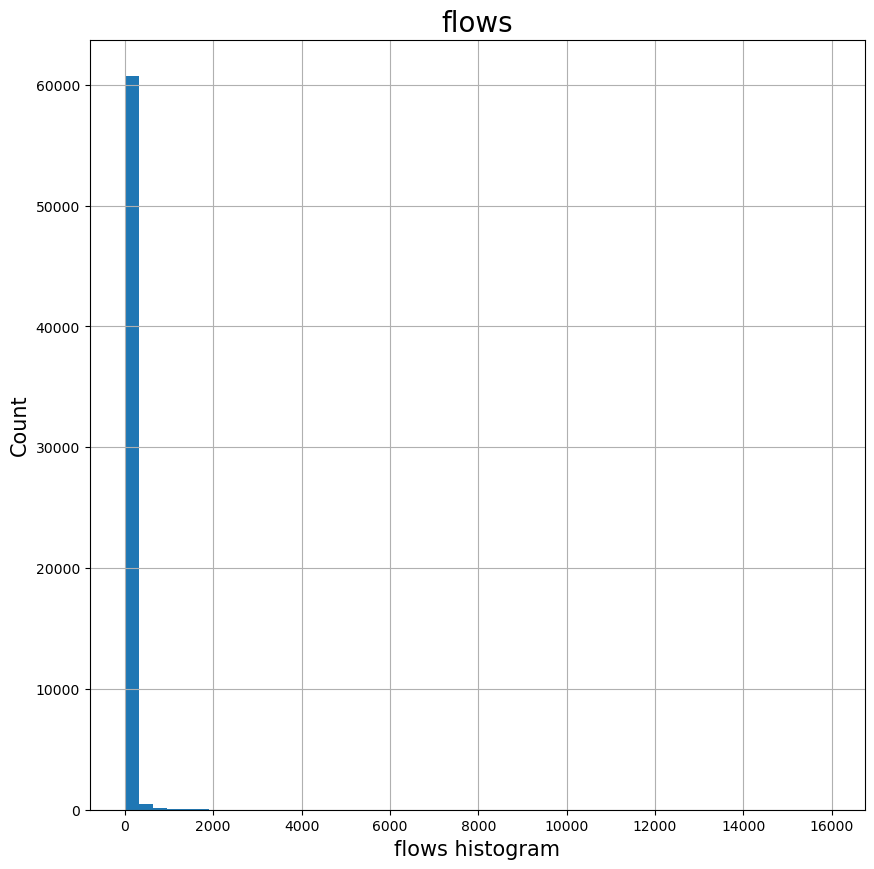

In [34]:
plt.subplots(figsize=(10,10))

plt.hist(cdatasub["flows"], histtype="stepfilled" , bins = 50)
plt.xlabel("flows histogram", fontsize = 15)
plt.ylabel("Count", fontsize= 15)
plt.title("flows", fontsize = 20)
plt.grid(True)

Text(0, 0.5, 'log(flows)')

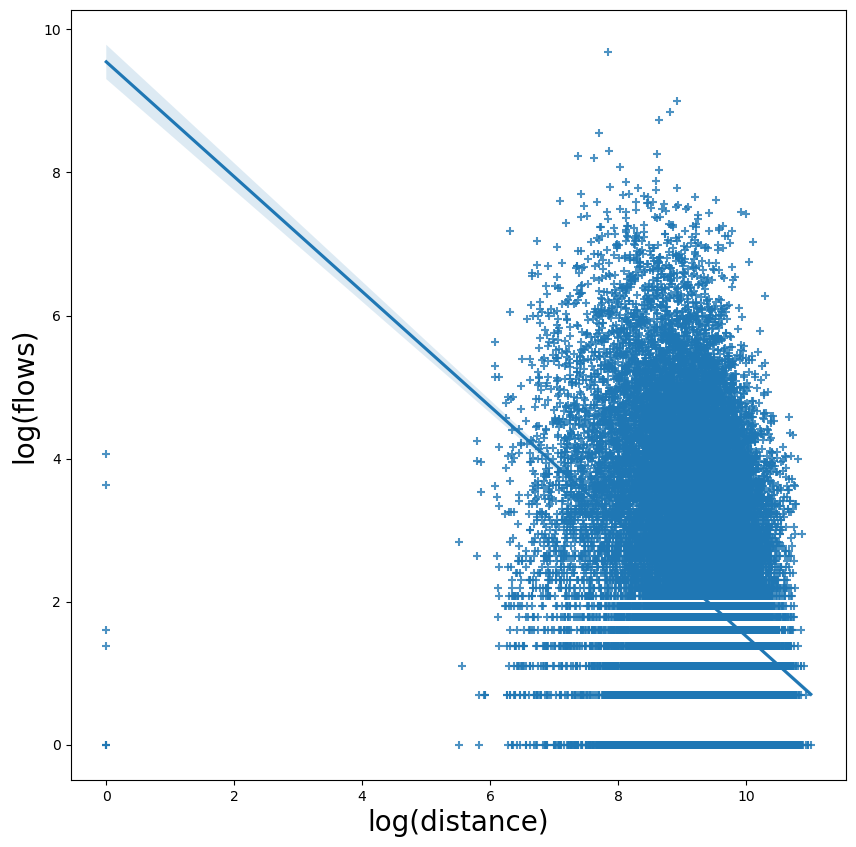

In [38]:
#subset the dataframe to the flows we want
cdatasub_flows = cdatasub[["flows", "distance"]]
#remove all 0 values (logarithms can't deal with 0 values)
cdatasub_flows = cdatasub_flows[(cdatasub_flows!=0).all(1)]

#extract the x and y converting to log
x = np.log(cdatasub_flows["distance"])
y = np.log(cdatasub_flows["flows"])

#create the subplot
fig, ax = plt.subplots(figsize = (10,10))
#plot the results along with the line of best fit
sns.regplot(x=x, y=y, marker="+", ax=ax)
ax.set_xlabel("log(distance)", fontsize = 20)
ax.set_ylabel("log(flows)", fontsize = 20)

Text(0, 0.5, 'flows')

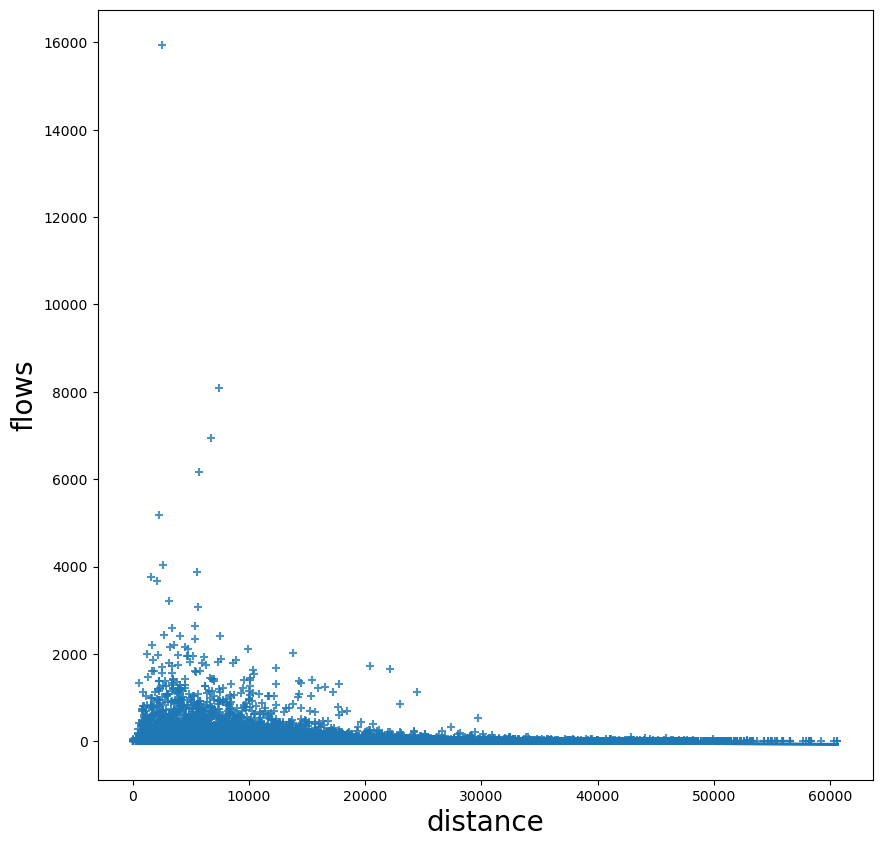

In [39]:
#subset the dataframe to the flows we want
cdatasub_flows = cdatasub[["flows", "distance"]]


#extract the x and y converting to log
x =cdatasub_flows["distance"]
y =cdatasub_flows["flows"]

#create the subplot
fig, ax = plt.subplots(figsize = (10,10))
#plot the results along with the line of best fit
sns.regplot(x=x, y=y, marker="+", ax=ax)
ax.set_xlabel("distance", fontsize = 20)
ax.set_ylabel("flows", fontsize = 20)

In [42]:
canary_wharf_jobs = cdatasub.loc[cdatasub['station_destination'] == 'Canary Wharf', 'jobs']


print(canary_wharf_jobs)


3        58772
126      58772
348      58772
595      58772
817      58772
         ...  
60595    58772
60838    58772
61062    58772
61294    58772
61442    58772
Name: jobs, Length: 305, dtype: int64


In [22]:
cdatasub = pd.read_csv("london_flows.csv") 


station_origin = cdatasub['station_origin']
station_destination = cdatasub['station_destination']
flows = cdatasub['flows']
population = cdatasub['population']
jobs = cdatasub['jobs']
distance = cdatasub['distance']


jobs_adjusted = jobs / 2  


total_population = np.sum(population)
total_jobs_adjusted = np.sum(jobs_adjusted)


beta = -0.0002
new_flows = []
for i in range(len(cdatasub)):
    A_i = 1 / np.sum((1 / total_jobs_adjusted) * flows * (population / total_population) * (distance ** (-beta)))
    B_j = 1 / np.sum((1 / total_population) * flows * (jobs_adjusted / total_jobs_adjusted) * (distance ** (-beta)))
    new_flow = A_i * B_j * population[i] * jobs_adjusted[i] * (distance[i] ** (-beta))
    new_flows.append(new_flow)


cdatasub['flows'] = new_flows


cdatasub.to_csv("cdatasubA.csv", index=False)


In [24]:
cdatasubA = pd.read_csv("cdatasubA.csv")

In [25]:

cdatasubA["flows"] = cdatasubA["flows"]/10000000000000000000
cdatasubA

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,25.186353,599,78549,8131.410852
1,Abbey Road,Beckton,0.141726,599,442,8510.047006
2,Abbey Road,Blackwall,0.213196,599,665,3775.359872
3,Abbey Road,Canary Wharf,18.843186,599,58772,5086.404941
4,Abbey Road,Canning Town,4.945632,599,15428,2228.874185
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,14.120001,7892,3342,13401.628472
61470,Woolwich Arsenal,West Ham,23.180656,7892,5487,8701.356350
61471,Woolwich Arsenal,West India Quay,1.689891,7892,400,9536.612624
61472,Woolwich Arsenal,West Silvertown,3.772246,7892,893,5355.214219


In [93]:
#show the actual flows between boroughs
cdatasubmatA = pd.pivot_table(cdatasubA, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
#show the data
cdatasubmatA

C:\Users\10945\AppData\Local\Temp\ipykernel_37788\3374508299.py:2: FutureWarning: The provided callable <function sum at 0x000001AFFA3037E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmatA = pd.pivot_table(cdatasubA, values ="flows", index="station_origin", columns = "station_destination",
C:\Users\10945\AppData\Local\Temp\ipykernel_37788\3374508299.py:2: FutureWarning: The provided callable <function sum at 0x000001AFFA3037E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmatA = pd.pivot_table(cdatasubA, values ="flows", index="station_origin", columns = "station_destination",
C:\Users\10945\AppData\Local\Temp\ipykernel_37788\3374508299.py:2: FutureWarning: The provided callable <function sum at 0x000001AFFA3037E

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.419510,82.927848
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.158560,NaN,NaN,154.085031
Acton Town,NaN,NaN,NaN,15.599111,15.899833,NaN,1.484979,0.513236,NaN,16.242325,...,12.618207,1.194644,4.301947,3.162499,NaN,1.415361,NaN,1.493490,NaN,2719.035363
Aldgate,NaN,NaN,3.401500,NaN,12.246768,NaN,NaN,0.395529,NaN,12.513037,...,9.724318,NaN,3.314800,2.437435,NaN,1.090565,NaN,1.150831,NaN,2106.618698
Aldgate East,NaN,NaN,3.738596,13.205865,NaN,NaN,1.258147,0.434726,NaN,13.753251,...,10.688017,1.011905,3.643308,2.678994,NaN,1.198617,NaN,1.264881,NaN,2340.735579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,5.738239,20.276477,20.666917,NaN,NaN,NaN,NaN,21.113411,...,16.404490,NaN,5.591920,NaN,NaN,NaN,NaN,NaN,NaN,3506.061642
Woodgrange Park,NaN,0.212781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.976268
Woodside Park,NaN,NaN,3.645789,12.883385,13.131752,NaN,1.226896,NaN,NaN,13.414303,...,10.422618,NaN,3.552938,NaN,NaN,NaN,NaN,NaN,NaN,2173.778577


In [90]:
cdatasubmat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [95]:
cdatasub = pd.read_csv("london_flows.csv") 
CalcRSqaured(cdatasub["flows"],cdatasubA["flows"])

0.35838464349066657

In [96]:
CalcRMSE(cdatasub["flows"],cdatasubA["flows"])

108.071

In [7]:
cdatasub = pd.read_csv("london_flows.csv") 

station_origin = cdatasub['station_origin']
station_destination = cdatasub['station_destination']
flows = cdatasub['flows']
population = cdatasub['population']
jobs = cdatasub['jobs']
distance = cdatasub['distance']

total_population = np.sum(flows)
total_jobs = np.sum(flows)

beta = -1
new_flows = []
for i in range(len(cdatasub)):
    A_i = 1 / np.sum((1 / total_jobs) * flows * (population / total_population) * (distance ** (-beta)))
    B_j = 1 / np.sum((1 / total_population) * flows * (jobs / total_jobs) * (distance ** (-beta)))
    new_flow = A_i * B_j * population[i] * jobs[i] * (distance[i] ** (-beta))
    new_flows.append(new_flow)


cdatasub['flows'] = new_flows


cdatasub.to_csv("cdatasubB1.csv", index=False)



In [45]:
cdatasubB1 = pd.read_csv("cdatasubB1.csv")

In [46]:
cdatasubB1["flows"] = cdatasubB1["flows"]/10000000000000000
cdatasubB1

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,13.765166,599,78549,8131.525097
1,Abbey Road,Beckton,0.081064,599,442,8510.121774
2,Abbey Road,Blackwall,0.054108,599,665,3775.448872
3,Abbey Road,Canary Wharf,6.442575,599,58772,5086.514220
4,Abbey Road,Canning Town,0.741094,599,15428,2228.923167
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,12.717404,7892,3342,13401.795549
61470,Woolwich Arsenal,West Ham,13.556758,7892,5487,8701.454361
61471,Woolwich Arsenal,West India Quay,1.083149,7892,400,9536.720451
61472,Woolwich Arsenal,West Silvertown,1.357876,7892,893,5355.248554


In [47]:
#show the actual flows between boroughs
cdatasubmatB1 = pd.pivot_table(cdatasubB1, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
#show the data
cdatasubmatB1

C:\Users\10945\AppData\Local\Temp\ipykernel_20300\218403904.py:2: FutureWarning: The provided callable <function sum at 0x000001316862B6A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmatB1 = pd.pivot_table(cdatasubB1, values ="flows", index="station_origin", columns = "station_destination",
C:\Users\10945\AppData\Local\Temp\ipykernel_20300\218403904.py:2: FutureWarning: The provided callable <function sum at 0x000001316862B6A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmatB1 = pd.pivot_table(cdatasubB1, values ="flows", index="station_origin", columns = "station_destination",
C:\Users\10945\AppData\Local\Temp\ipykernel_20300\218403904.py:2: FutureWarning: The provided callable <function sum at 0x000001316862B6

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.881307,28.330918
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.284639,NaN,NaN,172.470143
Acton Town,NaN,NaN,NaN,17.766516,18.367658,NaN,0.496522,1.291964,NaN,17.210968,...,13.305697,1.126784,6.662516,1.349668,NaN,2.999147,NaN,2.621007,NaN,2740.073904
Aldgate,NaN,NaN,3.874118,NaN,1.183049,NaN,NaN,1.202377,NaN,2.970307,...,12.471770,NaN,2.816630,2.034714,NaN,1.157900,NaN,1.342011,NaN,962.049267
Aldgate East,NaN,NaN,4.318866,1.275698,NaN,NaN,1.873903,1.328654,NaN,3.490098,...,13.881600,1.201655,3.155459,2.280254,NaN,1.156913,NaN,1.495730,NaN,1069.874292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,12.159317,21.528401,19.947843,NaN,NaN,NaN,NaN,25.528029,...,37.116322,NaN,8.385734,NaN,NaN,NaN,NaN,NaN,NaN,4513.197839
Woodgrange Park,NaN,0.381975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.041890
Woodside Park,NaN,NaN,6.398192,15.023624,15.528390,NaN,2.563148,NaN,NaN,12.936351,...,19.787673,NaN,5.164059,NaN,NaN,NaN,NaN,NaN,NaN,2634.745535


In [48]:
cdatasubmat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [49]:
cdatasub = pd.read_csv("london_flows.csv") 
CalcRSqaured(cdatasub["flows"],cdatasubB1["flows"])

0.148980819245559

In [50]:
CalcRMSE(cdatasub["flows"],cdatasubB1["flows"])

123.253

In [25]:
cdatasub = pd.read_csv("london_flows.csv") 

station_origin = cdatasub['station_origin']
station_destination = cdatasub['station_destination']
flows = cdatasub['flows']
population = cdatasub['population']
jobs = cdatasub['jobs']
distance = cdatasub['distance']

total_population = np.sum(population)
total_jobs = np.sum(jobs)

beta = -10
new_flows = []
for i in range(len(cdatasub)):
    A_i = 1 / np.sum((1 / total_jobs) * flows * (population / total_population) * (distance ** (-beta)))
    B_j = 1 / np.sum((1 / total_population) * flows * (jobs / total_jobs) * (distance ** (-beta)))
    new_flow = A_i * B_j * population[i] * jobs[i] * (distance[i] ** (-beta))
    new_flows.append(new_flow)

cdatasub['flows'] = new_flows

cdatasub.to_csv("cdatasubB2.csv", index=False)


In [33]:
cdatasubB2 = pd.read_csv("cdatasubB2.csv")

In [34]:
cdatasubB2["flows"] = cdatasubB2["flows"]*10000000000000000000000
cdatasubB2

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0.000013,599,78549,8131.525097
1,Abbey Road,Beckton,0.0,599,442,8510.121774
2,Abbey Road,Blackwall,0.0,599,665,3775.448872
3,Abbey Road,Canary Wharf,0.0,599,58772,5086.514220
4,Abbey Road,Canning Town,0.0,599,15428,2228.923167
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,0.001039,7892,3342,13401.795549
61470,Woolwich Arsenal,West Ham,0.000023,7892,5487,8701.454361
61471,Woolwich Arsenal,West India Quay,0.000004,7892,400,9536.720451
61472,Woolwich Arsenal,West Silvertown,0.0,7892,893,5355.248554


In [46]:
#show the actual flows between boroughs
cdatasubmatB2 = pd.pivot_table(cdatasubB2, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
#show the data
cdatasubmatB2

C:\Users\10945\AppData\Local\Temp\ipykernel_9352\546357434.py:2: FutureWarning: The provided callable <function sum at 0x00000157E1C4FE20> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmatB2 = pd.pivot_table(cdatasubB2, values ="flows", index="station_origin", columns = "station_destination",
C:\Users\10945\AppData\Local\Temp\ipykernel_9352\546357434.py:2: FutureWarning: The provided callable <function sum at 0x00000157E1C4FE20> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmatB2 = pd.pivot_table(cdatasubB2, values ="flows", index="station_origin", columns = "station_destination",
C:\Users\10945\AppData\Local\Temp\ipykernel_9352\546357434.py:2: FutureWarning: The provided callable <function sum at 0x00000157E1C4FE20>

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000003,0.000026
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.011532,NaN,NaN,1.350524
Acton Town,NaN,NaN,NaN,0.01198,0.014072,NaN,0.0,1.098031,NaN,0.006061,...,0.004484,0.000139,0.071447,0.0,NaN,0.540762,NaN,0.086605,NaN,33.258065
Aldgate,NaN,NaN,0.002612,NaN,0.0,NaN,NaN,5.58362,NaN,0.0,...,0.02449,NaN,0.000136,0.000084,NaN,0.000415,NaN,0.001119,NaN,37.684542
Aldgate East,NaN,NaN,0.003309,0.0,NaN,NaN,0.01414,6.475833,NaN,0.0,...,0.030533,0.00118,0.000181,0.000112,NaN,0.000176,NaN,0.001414,NaN,19.935963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.192387,0.007718,0.003032,NaN,NaN,NaN,NaN,0.029481,...,12.074498,NaN,0.067286,NaN,NaN,NaN,NaN,NaN,NaN,523.143394
Woodgrange Park,NaN,0.015476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.316408
Woodside Park,NaN,NaN,0.211414,0.012527,0.01468,NaN,0.406715,NaN,NaN,0.001951,...,1.327097,NaN,0.031272,NaN,NaN,NaN,NaN,NaN,NaN,107.664354


In [47]:
cdatasub = pd.read_csv("london_flows.csv") 
CalcRSqaured(cdatasub["flows"],cdatasubB2["flows"])

6.586757156451264e-05

In [48]:
CalcRMSE(cdatasub["flows"],cdatasubB2["flows"])

134.981